In [ ]:
# Context
# This dataset is created for prediction of Graduate Admissions from an Indian perspective.

# Content
# The dataset contains several parameters which are considered important during the application for Masters Programs.
# The parameters included are :

# GRE Scores ( out of 340 )
# TOEFL Scores ( out of 120 )
# University Rating ( out of 5 )
# Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
# Undergraduate GPA ( out of 10 )
# Research Experience ( either 0 or 1 )
# Chance of Admit ( ranging from 0 to 1 )
# Acknowledgements
# This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
# The dataset is owned by Mohan S Acharya.

# Inspiration
# This dataset was built with the purpose of helping students in shortlisting universities with their profiles. 
#The predicted output gives them a fair idea about their chances for a particular university.

# Citation
# Please cite the following if you are interested in using the dataset :
# Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

# I would like to thank all of you for contributing to this dataset through discussions and questions. 
#I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
df.drop(columns=['Serial No.'],axis=1,inplace=True)
df.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


<Axes: xlabel='University Rating', ylabel='count'>

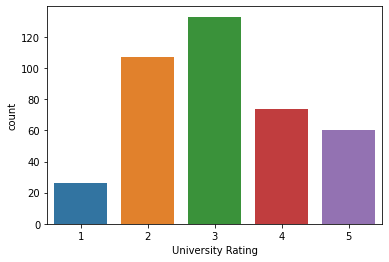

In [5]:
sns.countplot(df['University Rating'])

In [7]:
df['University Rating'].value_counts(ascending=False)

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

<Axes: xlabel='Chance of Admit ', ylabel='GRE Score'>

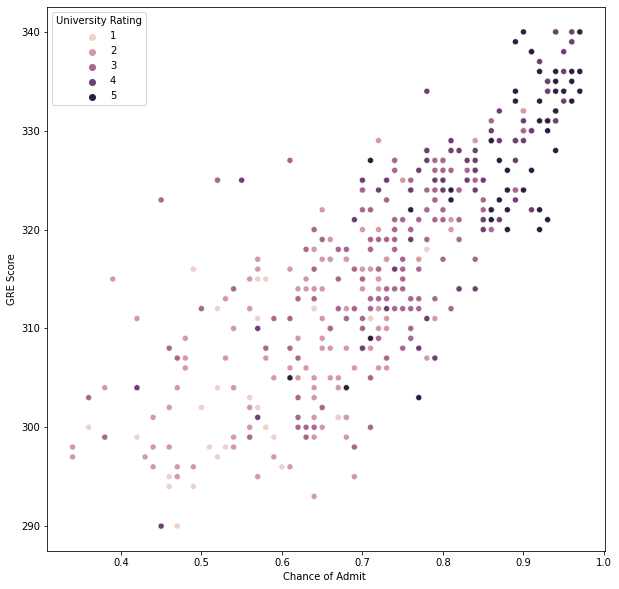

In [8]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=df['Chance of Admit '],y=df['GRE Score'],hue=df['University Rating'])

In [11]:
grp=df.groupby(by='University Rating').agg(AvgGRE=('GRE Score','mean'),
                                           AvgTOFEL=('TOEFL Score','mean'),
                                           AvgCGPA=('CGPA','mean'),
                                           Admit=('Chance of Admit ','mean'))
                                           
print(grp)

                       AvgGRE    AvgTOFEL   AvgCGPA     Admit
University Rating                                            
1                  303.153846   99.076923  7.745769  0.548077
2                  309.177570  103.523364  8.183738  0.625981
3                  315.954887  106.887218  8.552256  0.711880
4                  324.824324  111.824324  9.021622  0.818108
5                  328.333333  113.666667  9.291167  0.888167


In [15]:
x=df[(df['Chance of Admit ']>0.8) & (df['University Rating']==5)]
x.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000
mean,330.480769,114.692308,5.0,4.567308,4.442308,9.379808,0.980769,0.913077
std,5.916048,3.398607,0.0,0.431923,0.548204,0.282465,0.138675,0.037810
min,320.000000,107.000000,5.0,3.500000,3.000000,8.660000,0.000000,0.810000
25%,325.500000,112.000000,5.0,4.000000,4.000000,9.197500,1.000000,0.890000
50%,331.000000,115.000000,5.0,4.500000,4.500000,9.360000,1.000000,0.920000
75%,335.000000,118.000000,5.0,5.000000,5.000000,9.570000,1.000000,0.940000
max,340.000000,120.000000,5.0,5.000000,5.000000,9.910000,1.000000,0.970000


<Figure size 720x720 with 0 Axes>

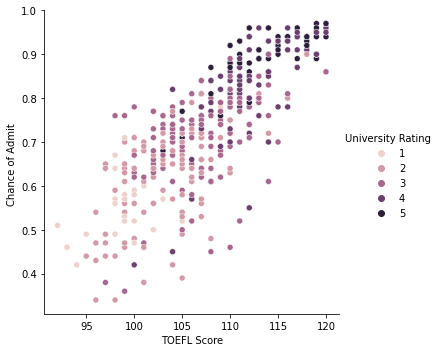

In [16]:
plt.figure(figsize=(10,10))

sns.relplot(x=df['TOEFL Score'],y=df['Chance of Admit '],hue=df['University Rating'])

<Axes: >

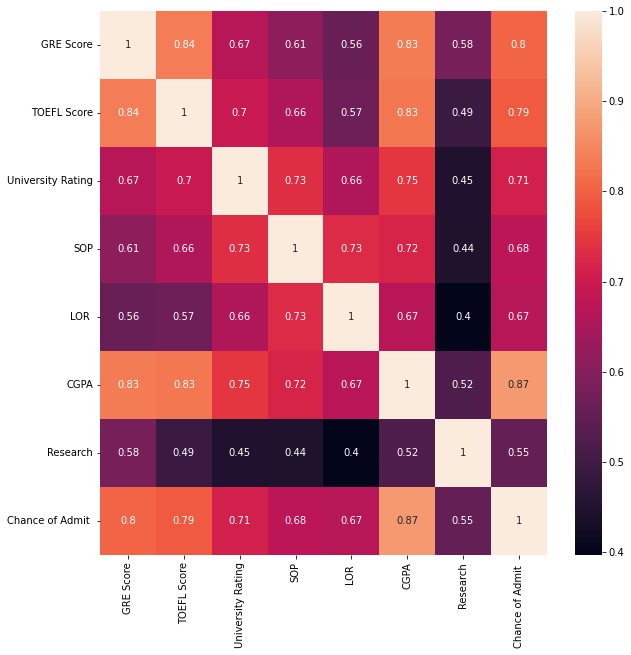

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [28]:
x=df.drop(columns='Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaler=ss.fit_transform(x)

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
x_pc=pca.fit_transform(x_scaler)
x_pc.shape

(400, 6)

In [37]:
df2=pd.DataFrame(x_pc)

<Axes: >

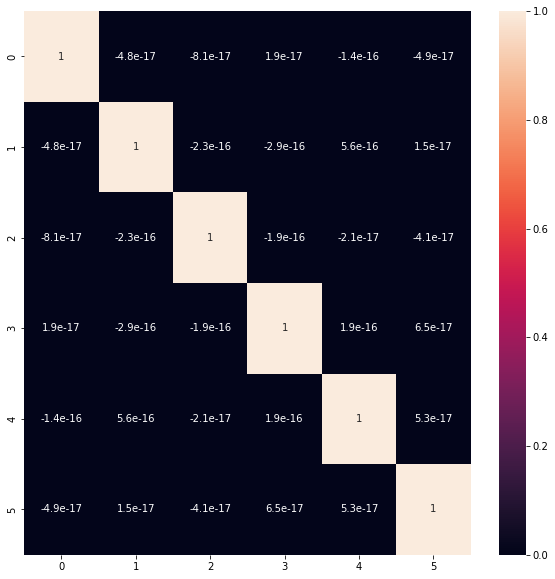

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_pc,y,test_size=0.2,random_state=7)

In [44]:
from math import sqrt

lm=LinearRegression()

lm.fit(x_train,y_train)
y_train_pred=lm.predict(x_train)
q=r2_score(y_train,y_train_pred)
rmse_train=sqrt(mean_squared_error(y_train,y_train_pred))

# adj r2
n=len(y_train)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_train,y_train_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_train} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.7990515282560944}
value of rmse is {0.06346321922685283}
value of adj.r2 is {0.795199480874422}


In [45]:
# Test data

y_test_pred=lm.predict(x_test)
q=r2_score(y_test,y_test_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_test_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_test_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.7760886807676564}
value of rmse is {0.06879562518732268}
value of adj.r2 is {0.7576850106937651}


In [47]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5, random_state=0, max_iter=10000)
model.fit(x_train, y_train)
model.alpha_

0.0002716100948347582

In [52]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=model.alpha_)
lasso.fit(x_train, y_train)
y_pred=lasso.predict(x_test)
q=r2_score(y_test,y_test_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )

value of r2 is {0.7760886807676564}
value of rmse is {0.06862829252584687}


In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.705040872773866}
value of rmse is {0.0789593777415535}
value of adj.r2 is {0.6807976568374714}


In [54]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=6,min_samples_split=11,random_state=7)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.5569178301269879}
value of rmse is {0.09677539091483013}
value of adj.r2 is {0.5205001175346855}


In [55]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=6,min_samples_split=11,random_state=7,n_estimators=20)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.713997388472726}
value of rmse is {0.07775132462786488}
value of adj.r2 is {0.6904903245115801}


In [56]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.6936173796585516}
value of rmse is {0.08047386505416709}
value of adj.r2 is {0.6684352464798025}


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.6997657397039168}
value of rmse is {0.07966231479187967}
value of adj.r2 is {0.6750889511864304}


In [58]:
from sklearn.ensemble import AdaBoostRegressor

abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.6670532334056298}
value of rmse is {0.08389000072450709}
value of adj.r2 is {0.6396877457403392}


In [59]:
from xgboost import XGBRegressor

xbr=XGBRegressor()
xbr.fit(x_train,y_train)
y_pred=xbr.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.6779564037758405}
value of rmse is {0.08250497389193208}
value of adj.r2 is {0.6514870670998822}


In [60]:
from sklearn.ensemble import VotingRegressor

voting=VotingRegressor([('lin_reg',lm), ('lasso',lasso), ('knnr',knn) ,
                       ('dtr',dt), ('rfr',rf),('svr',svr),('gbr',gbr),
                       ('abr',abr),('xbr',xbr)],weights=[1,1,1,1,1,1,1,1,1])

voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.7344761233399723}
value of rmse is {0.07491600111215906}
value of adj.r2 is {0.7126522430665454}


In [62]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'gamma':[0.1,0.01,0.001,1],'C':[0.1,1,10,5],
            'kernel':['rbf','sigmoid']}]
sv1=SVR()
grid=GridSearchCV(sv1,param_grid,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 5, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [64]:
from sklearn.svm import SVR
svr=SVR(kernel='sigmoid',C=5,gamma=.01)
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.7707394409399863}
value of rmse is {0.06961253846991329}
value of adj.r2 is {0.7518961073186152}


In [63]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.6936173796585516}
value of rmse is {0.08047386505416709}
value of adj.r2 is {0.6684352464798025}


In [67]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'max_depth':[5,10,15,20],'max_leaf_nodes':[2,5,7,10,15,20],
            'n_estimators':[5,10,15,20,25],'criterion':['squared_error','mean_squared_error']}]
rf1=RandomForestRegressor(random_state=7)
grid=GridSearchCV(rf1,param_grid,cv=20)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 15,
 'max_leaf_nodes': 20,
 'n_estimators': 25}

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=15,max_leaf_nodes=20,random_state=7,n_estimators=25,
                        criterion='squared_error')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
q=r2_score(y_test,y_pred)
rmse_test=sqrt(mean_squared_error(y_test,y_pred))

# adj r2
n=len(y_test)
k=x_pc.shape[1]

adj_r2=1-((1-r2_score(y_test,y_pred))*(n-1)/(n-k-1))

print('value of r2 is',{q} )
print('value of rmse is',{rmse_test} )
print('value of adj.r2 is',{adj_r2} )

value of r2 is {0.699896689632423}
value of rmse is {0.07964494017223597}
value of adj.r2 is {0.6752306641227591}
